In [1]:
from tensorflow.keras.applications import VGG16, InceptionV3, InceptionResNetV2
from keras.applications.resnet50 import ResNet50
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.4.1
2.4.0


In [2]:
h,w = 300, 300

model = Sequential()
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(h,w,3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(48, (5, 5), activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(75, (5, 5), activation='relu'))
model.add(Conv2D(100, (5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(260, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(120, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 296, 296, 8)       608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 16)      3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 68, 68, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 48)        3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

optimizer = RMSprop(lr = 0.0001, rho = 0.99)

model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

train_data_dir = r'C:\Users\Jakub\Desktop\Projekt Dog Breed\dog-breed-identification\train_new'
validation_data_dir = r'C:\Users\Jakub\Desktop\Projekt Dog Breed\dog-breed-identification\validation_new'
epochs = 100
batch_size = 16

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   rotation_range=45, 
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size=(h, w), 
                                                    batch_size=batch_size, 
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(h, w), 
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 7822 images belonging to 120 classes.
Found 2400 images belonging to 120 classes.


In [4]:
history = History()
early_stopping = EarlyStopping(patience=30,monitor="val_accuracy")
save_best_model = ModelCheckpoint(r'C:\Users\Jakub\Desktop\GitHubProjects\dog_breed_classifier\baseline_model.h5',save_best_only=True)

model.fit(train_generator, batch_size=batch_size, epochs=epochs, 
                    validation_data=validation_generator,  callbacks=[early_stopping, history, save_best_model])

Epoch 1/100
489/489 [==============================] - 476s 970ms/step - loss: 4.7868 - accuracy: 0.0108 - val_loss: 4.7699 - val_accuracy: 0.0133
Epoch 2/100
489/489 [==============================] - 456s 933ms/step - loss: 4.7396 - accuracy: 0.0154 - val_loss: 4.7156 - val_accuracy: 0.0188
Epoch 3/100
489/489 [==============================] - 456s 932ms/step - loss: 4.6542 - accuracy: 0.0255 - val_loss: 4.6557 - val_accuracy: 0.0237
Epoch 4/100
489/489 [==============================] - 457s 934ms/step - loss: 4.5698 - accuracy: 0.0292 - val_loss: 4.5180 - val_accuracy: 0.0325
Epoch 5/100
489/489 [==============================] - 460s 941ms/step - loss: 4.4826 - accuracy: 0.0335 - val_loss: 4.4626 - val_accuracy: 0.0329
Epoch 6/100
489/489 [==============================] - 466s 953ms/step - loss: 4.4341 - accuracy: 0.0438 - val_loss: 4.4218 - val_accuracy: 0.0362
Epoch 7/100
489/489 [==============================] - 456s 932ms/step - loss: 4.3719 - accuracy: 0.0473 - val_loss: 4

489/489 [==============================] - 456s 933ms/step - loss: 2.8401 - accuracy: 0.2748 - val_loss: 4.1801 - val_accuracy: 0.1112
Epoch 57/100
489/489 [==============================] - 455s 930ms/step - loss: 2.7894 - accuracy: 0.2933 - val_loss: 4.0564 - val_accuracy: 0.1283
Epoch 58/100
489/489 [==============================] - 455s 929ms/step - loss: 2.7677 - accuracy: 0.2950 - val_loss: 4.0468 - val_accuracy: 0.1287
Epoch 59/100
489/489 [==============================] - 454s 928ms/step - loss: 2.7770 - accuracy: 0.2864 - val_loss: 4.1388 - val_accuracy: 0.1175
Epoch 60/100
489/489 [==============================] - 455s 929ms/step - loss: 2.6953 - accuracy: 0.3105 - val_loss: 4.1003 - val_accuracy: 0.1300
Epoch 61/100
489/489 [==============================] - 456s 931ms/step - loss: 2.7273 - accuracy: 0.2958 - val_loss: 4.1179 - val_accuracy: 0.1287
Epoch 62/100
489/489 [==============================] - 455s 930ms/step - loss: 2.7123 - accuracy: 0.2946 - val_loss: 4.0554 

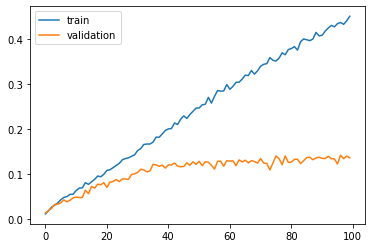

In [5]:
plt.plot(history.history['accuracy'], label = "train")
plt.plot(history.history['val_accuracy'], label = "validation")


plt.legend()
plt.show()